# Pandasaurus CxG Extension Walkthrough 

## Overview
Welcome to this Jupyter notebook walkthrough for pandasaurus_cxg! This library provides powerful tools for analyzing and enriching AnnData objects, enabling you to gain deeper insights into your single-cell RNA sequencing (scRNA-seq) data.

In this notebook, we will explore two main classes: `AnndataEnricher` and `AnndataAnalyzer`. Let's dive in and see how these classes can help us in our scRNA-seq analysis.

Now, let's get started with an example workflow that demonstrates the capabilities of these classes. We'll load an example dataset, perform enrichment, analysis, and visualization steps to gain a better understanding of our scRNA-seq data.

## Test Data
The following files are used in the walkthrough. Please download them manually to a folder of your choice. Ensure that you adjust the file paths used in the examples to match your local file paths.
- [Time-resolved Systems Immunology Reveals a Late Juncture Linked to Fatal COVID-19: Adaptive Cells](https://cellxgene.cziscience.com/collections/db14ce52-5dd6-4649-a9e9-7fb2572d0605)
- [Integrated Single-nucleus and Single-cell RNA-seq of the Adult Human Kidney](https://cellxgene.cziscience.com/collections/36b8480d-114e-42fe-b6a9-bdf79a7eb1fc)

## AnndataEnricher Walkthrough

### Initialization
Let's import the necessary modules and initialize our AnndataEnricher

In [1]:
from pandasaurus_cxg.anndata_enricher import AnndataEnricher

In [2]:
# Using Time-resolved Systems Immunology Reveals a Late Juncture Linked to Fatal COVID-19: Adaptive Cells dataset
ade = AnndataEnricher.from_file_path("./immune_example.h5ad")

AnnData object loaded into AnnDataEnricher

In [3]:
ade._anndata.obs[0:5]

,tissue_ontology_term_id,author_cell_type,disease_ontology_term_id,age,days_since_hospitalized,donor_id,severity,dsm_severity_score,ever_admitted_to_icu,days_since_onset,...,organism_ontology_term_id,suspension_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
AAACCTGAGACGACGT-1_1,UBERON:0000178,naive B cell,PATO:0000461,32.0,,AA220907,,NaN,,,...,NCBITaxon:9606,cell,naive B cell,10x 5' v1,normal,Homo sapiens,female,blood,unknown,32-year-old human stage
AAACCTGAGCTAGTTC-1_1,UBERON:0000178,naive B cell,MONDO:0100096,37.0,6.0,HGR0000079,Critical,NaN,False,30.0,...,NCBITaxon:9606,cell,naive B cell,10x 5' v1,COVID-19,Homo sapiens,female,blood,European,37-year-old human stage
AAACCTGCATAGACTC-1_1,UBERON:0000178,memory B cell,PATO:0000461,32.0,,AA220907,,NaN,,,...,NCBITaxon:9606,cell,memory B cell,10x 5' v1,normal,Homo sapiens,female,blood,unknown,32-year-old human stage
AAACCTGCATTAACCG-1_1,UBERON:0000178,naive B cell,MONDO:0100096,54.0,1.0,HGR0000143,Critical,1.674056,True,8.0,...,NCBITaxon:9606,cell,naive B cell,10x 5' v1,COVID-19,Homo sapiens,female,blood,East Asian,54-year-old human stage
AAACCTGGTCATCGGC-1_1,UBERON:0000178,gamma-delta T cell,MONDO:0100096,55.0,1.0,HGR0000083,Moderate,-1.950858,False,6.0,...,NCBITaxon:9606,cell,gamma-delta T cell,10x 5' v1,COVID-19,Homo sapiens,male,blood,European,55-year-old human stage


### Enrichment

Enrichment methods use the structure of the ontology to provide relevant semantic enrichment to cell type ontology annotation in the CxG Anndata file.  Results are returned as a simple pandas dataframe.

Users can choose from a range of techniques to limit enrichment to some relevant context.

#### Simple enrichment

In simple enichment the context is just the terms CL terms used in annotation.

In [4]:
ade.simple_enrichment()

,s,s_label,p,o,o_label
0,CL:0000798,gamma-delta T cell,rdfs:subClassOf,CL:0000084,T cell
1,CL:0000809,"double-positive, alpha-beta thymocyte",rdfs:subClassOf,CL:0000084,T cell
2,CL:0000813,memory T cell,rdfs:subClassOf,CL:0000084,T cell
3,CL:0000815,regulatory T cell,rdfs:subClassOf,CL:0000084,T cell
4,CL:0000895,"naive thymus-derived CD4-positive, alpha-beta ...",rdfs:subClassOf,CL:0000084,T cell
5,CL:0000897,"CD4-positive, alpha-beta memory T cell",rdfs:subClassOf,CL:0000084,T cell
6,CL:0000897,"CD4-positive, alpha-beta memory T cell",rdfs:subClassOf,CL:0000813,memory T cell
7,CL:0000900,"naive thymus-derived CD8-positive, alpha-beta ...",rdfs:subClassOf,CL:0000084,T cell
8,CL:0000909,"CD8-positive, alpha-beta memory T cell",rdfs:subClassOf,CL:0000084,T cell
9,CL:0000909,"CD8-positive, alpha-beta memory T cell",rdfs:subClassOf,CL:0000813,memory T cell


In the returned dataframe, terms in the `obs.cell_type` field are listed in columns `s` and `s_label`. Columns `o` an `o_label` show which of these terms classify other terms used in `obs.cell_type`.

We can use this get a list of all T cells in the anndata file.

(TBA)

#### Using Slim context for enrichment

The cell ontology contains a number of upper slims - sets of high level terms that can be used to summarise annotations with CL terms.  To see which slims are available, we can run:

In [5]:
ade.slim_list

[{'name': 'blood_and_immune_upper_slim',
  'description': 'a subset of general classes related to blood and the immune system, primarily of hematopoietic origin'},
 {'name': 'eye_upper_slim',
  'description': 'a subset of general classes related to specific cell types in the eye.'},
 {'name': 'general_cell_types_upper_slim',
  'description': 'a subset of general classes of cell types in the cell ontology.'}]

#### Minimal slim enrichment

As the dataset we are working with consists of immune cells, we will choose the blood_and_immune_upper_slim as context. (The method takes a list of slims, allowing them to be combined.)

In [6]:
ade.minimal_slim_enrichment(["blood_and_immune_upper_slim"])

,s,s_label,p,o,o_label
0,CL:0000084,T cell,rdfs:subClassOf,CL:0000842,mononuclear cell
1,CL:0000787,memory B cell,rdfs:subClassOf,CL:0000145,professional antigen presenting cell
2,CL:0000787,memory B cell,rdfs:subClassOf,CL:0000236,B cell
3,CL:0000787,memory B cell,rdfs:subClassOf,CL:0000842,mononuclear cell
4,CL:0000788,naive B cell,rdfs:subClassOf,CL:0000842,mononuclear cell
5,CL:0000788,naive B cell,rdfs:subClassOf,CL:0000145,professional antigen presenting cell
6,CL:0000788,naive B cell,rdfs:subClassOf,CL:0000236,B cell
7,CL:0000798,gamma-delta T cell,rdfs:subClassOf,CL:0000842,mononuclear cell
8,CL:0000798,gamma-delta T cell,rdfs:subClassOf,CL:0000084,T cell
9,CL:0000809,"double-positive, alpha-beta thymocyte",rdfs:subClassOf,CL:0000084,T cell


The `s` column now includes terms from the slim as well as terms used in `obs.cell_type`, so we get mappings up to terms like 'B cell'

#### Full slim enrichment

We can get a more extensive enrichment by using the `full_slim_enrichment` method. In this case we get mappings to all terms on the classification path up to the term in the slim.

In [7]:
full_enrichment =  ade.full_slim_enrichment(["blood_and_immune_upper_slim"])
len(full_enrichment)

164

In [8]:
full_enrichment[0:5]

,s,s_label,p,o,o_label
0,CL:0000084,T cell,rdfs:subClassOf,CL:0000842,mononuclear cell
1,CL:0000084,T cell,rdfs:subClassOf,CL:0000542,lymphocyte
2,CL:0000787,memory B cell,rdfs:subClassOf,CL:0000236,B cell
3,CL:0000787,memory B cell,rdfs:subClassOf,CL:0001201,"B cell, CD19-positive"
4,CL:0000787,memory B cell,rdfs:subClassOf,CL:0000542,lymphocyte


#### Contextual enrichment

The contextual enrichment method uses the anatomical context (obs.tissue) in the anndata file to define s context in CL.

To demonstrate this we will use a second example in which the anatomical context (contents of the tissuer field) is kidney.

In [9]:
#Using Integrated Single-nucleus and Single-cell RNA-seq of the Adult Human Kidney dataset
ade = AnndataEnricher.from_file_path("./blue_lake_kidney.h5ad")

ade._AnndataEnricher__context_list  # Future versions will look up the name of the anatomical context term(s)

In [10]:
ade.contextual_slim_enrichment()[0:20]

,s,s_label,p,o,o_label
0,CL:0000653,podocyte,rdfs:subClassOf,CL:1000612,kidney corpuscule cell
1,CL:0000653,podocyte,rdfs:subClassOf,CL:0002681,kidney cortical cell
2,CL:0000653,podocyte,rdfs:subClassOf,CL:0002584,renal cortical epithelial cell
3,CL:0000653,podocyte,rdfs:subClassOf,CL:0002681,kidney cortical cell
4,CL:0000653,podocyte,rdfs:subClassOf,CL:1000746,glomerular cell
5,CL:0000653,podocyte,rdfs:subClassOf,CL:1000612,kidney corpuscule cell
6,CL:0000653,podocyte,rdfs:subClassOf,CL:0002518,kidney epithelial cell
7,CL:0000653,podocyte,rdfs:subClassOf,CL:1000510,kidney glomerular epithelial cell
8,CL:0000653,podocyte,rdfs:subClassOf,CL:1000497,kidney cell
9,CL:0000653,podocyte,rdfs:subClassOf,CL:1000746,glomerular cell


contextual_slim_enrichment enriches using all cell type terms from CL that are defined as part_of the anatomical context.  For example, podocyte is classified as an "epitheliual cell of the glomerular capsule".

## AnndataAnalyzer walkthrough

### Initialization
Let's import the necessary modules and initialize our AnndataAnalyzer

In [11]:
from pandasaurus_cxg.anndata_analyzer import AnndataAnalyzer

In [12]:
# temporarily using a placeholder schema for free text cell types 
ada = AnndataAnalyzer("./immune_example.h5ad", "pandasaurus_cxg/schema/schema.json")

### Analyzer

#### Co-annotation report
Generates a co-annotation report based on the provided schema.  Each annotation (obs key:value pair) defines a set of cells in the matrix. If the cell sets defined by two annotations match (contain exactly the same cells), we record this as cluster_matches.  If one cell set containts the other, we record this using a subcluster_of relationship.  If the two sets partially overlap (intersect) we record this with a cluster_overlaps relationship.

In [13]:
ada.co_annotation_report()

,field_name1,value1,predicate,field_name2,value2
0,author_cell_type,naive B cell,cluster_matches,cell_type,naive B cell
1,author_cell_type,memory B cell,cluster_matches,cell_type,memory B cell
2,author_cell_type,gamma-delta T cell,cluster_matches,cell_type,gamma-delta T cell
3,author_cell_type,plasmablast,cluster_matches,cell_type,plasmablast
4,author_cell_type,regulatory T cell,cluster_matches,cell_type,regulatory T cell
5,author_cell_type,"CD4-positive, alpha-beta memory T cell",cluster_matches,cell_type,"CD4-positive, alpha-beta memory T cell"
6,author_cell_type,"CD8-positive, alpha-beta memory T cell",cluster_matches,cell_type,"CD8-positive, alpha-beta memory T cell"
7,author_cell_type,naive CD8+ T cell,cluster_matches,cell_type,"naive thymus-derived CD8-positive, alpha-beta ..."
8,author_cell_type,naive CD4+ T cell,cluster_matches,cell_type,"naive thymus-derived CD4-positive, alpha-beta ..."
9,author_cell_type,mucosal invariant T cell (MAIT),cluster_matches,cell_type,mucosal invariant T cell


In this example, each cell set defined by an 'author_cell_type' value has a matching cell set defined by the cell_type field (which contains a cell ontology term).

### Secondary Example

In [14]:
ada = AnndataAnalyzer("./blue_lake_kidney.h5ad", "pandasaurus_cxg/schema/schema.json")
ada.co_annotation_report()

,field_name1,value1,predicate,field_name2,value2
0,subclass.l3,dPT,cluster_matches,subclass.full,Degenerative Proximal Tubule Epithelial Cell
1,subclass.l3,aPT,cluster_matches,subclass.full,Adaptive / Maladaptive / Repairing Proximal Tu...
2,subclass.l3,M-FIB,cluster_matches,subclass.full,Medullary Fibroblast
3,subclass.l3,MD,cluster_matches,subclass.full,Macula Densa Cell
4,subclass.l3,NKC/T,cluster_matches,subclass.full,Natural Killer Cell / Natural Killer T Cell
...,...,...,...,...,...
415,cell_type,kidney distal convoluted tubule epithelial cell,subcluster_of,class,epithelial cells
416,cell_type,renal interstitial pericyte,subcluster_of,class,stroma cells
417,cell_type,neural cell,cluster_matches,class,neural cells
418,cell_type,parietal epithelial cell,subcluster_of,class,epithelial cells


In this case, we have many subcluster_of relationships.  In many cases these define more granular cell type/state annotations than those recorded using a cell ontology term in the cell_type field, e.g.

| field_name1	| value1 |	predicate| field_name2	| value2
| -- | -- | -- | -- | -- |
| Cycling Natural Killer Cell / Natural Killer T... |	subcluster_of |	cell_type | leukocyte`|

### Visualising co-annotation and enrichment as a graph

The subcluster_of relationships in a co-annotation define a hierarchy from more general set sets (epithelial cells, lymphocyte) to more granular ones (podocyte, T cell).  These in turn nest under the cell type heirarchy

## AnndataEnrichmentAnalyzer Walkthrough

A wrapper for AnndataEnricher and AnndataAnalyzer.

### Initialization
Let's import the necessary modules and initialize our AnndataAnalyzer

In [3]:
from pandasaurus_cxg.enrichment_analysis import AnndataEnrichmentAnalyzer
from pandasaurus_cxg.graph_generator.graph_generator import GraphGenerator

In [4]:
aea = AnndataEnrichmentAnalyzer("test/data/modified_human_kidney.h5ad")

#### Contextual enrichment

The contextual enrichment method uses the anatomical context (obs.tissue) in the anndata file to define s context in CL.

To demonstrate this we will use a second example in which the anatomical context (contents of the tissuer field) is kidney.

In [5]:
aea.contextual_slim_enrichment()

2023-08-14 12:46:23,596 - INFO - Transitive reduction has been applied on rdfs:subClassOf.


,s,s_label,p,o,o_label
0,CL:0000653,podocyte,rdfs:subClassOf,CL:0002584,renal cortical epithelial cell
1,CL:0000653,podocyte,rdfs:subClassOf,CL:1000746,glomerular cell
2,CL:0000653,podocyte,rdfs:subClassOf,CL:1000497,kidney cell
3,CL:0000653,podocyte,rdfs:subClassOf,CL:1000612,kidney corpuscule cell
4,CL:0000653,podocyte,rdfs:subClassOf,CL:0002518,kidney epithelial cell
...,...,...,...,...,...
132,CL:1001432,kidney collecting duct intercalated cell,rdfs:subClassOf,CL:0005010,renal intercalated cell
133,CL:1001432,kidney collecting duct intercalated cell,rdfs:subClassOf,CL:1000449,epithelial cell of nephron
134,CL:1001432,kidney collecting duct intercalated cell,rdfs:subClassOf,CL:1000454,kidney collecting duct epithelial cell
135,CL:1001432,kidney collecting duct intercalated cell,rdfs:subClassOf,CL:0002518,kidney epithelial cell


#### Co-annotation report
Generates a co-annotation report based on the provided schema.  Each annotation (obs key:value pair) defines a set of cells in the matrix. If the cell sets defined by two annotations match (contain exactly the same cells), we record this as cluster_matches.  If one cell set containts the other, we record this using a subcluster_of relationship.  If the two sets partially overlap (intersect) we record this with a cluster_overlaps relationship.

In [7]:
aea.co_annotation_report()

,field_name1,value1,predicate,field_name2,value2
0,subclass.l3,dPT,cluster_matches,subclass.full,Degenerative Proximal Tubule Epithelial Cell
1,subclass.l3,aPT,cluster_matches,subclass.full,Adaptive / Maladaptive / Repairing Proximal Tu...
2,subclass.l3,M-FIB,cluster_matches,subclass.full,Medullary Fibroblast
3,subclass.l3,MD,cluster_matches,subclass.full,Macula Densa Cell
4,subclass.l3,NKC/T,cluster_matches,subclass.full,Natural Killer Cell / Natural Killer T Cell
...,...,...,...,...,...
1198,subclass.l1,PEC,cluster_matches,cell_type,parietal epithelial cell
1199,subclass.l1,PapE,cluster_matches,cell_type,papillary tips cell
1200,class,immune cells,cluster_matches,cell_type,leukocyte
1201,class,endothelial cells,cluster_matches,cell_type,endothelial cell


### Graph Generator
We'll explore the features of the GraphGenerator class, a powerful tool for creating, enriching, saving, and visualizing RDF graphs. This class is designed to make working with RDF data and Cell Ontology terms intuitive and efficient.

To begin, we'll create an RDF graph using a sample DataFrame containing relevant data. The GraphGenerator class takes care of converting co_annotation DataFrame into RDF triples.
We can set label adding priorty to assign a label to each cell set node, and then add labels to the nodes.

In [13]:
gg = GraphGenerator(aea)
gg.generate_rdf_graph()
gg.set_label_adding_priority(["class", "cell_type", "subclass.l1", "subclass.l1", "subclass.full", "subclass.l2", "subclass.l3"])
gg.add_label_to_terms()

Next, we'll enrich our RDF graph using Cell Ontology terms from an enrichment DataFrame. The enrich_rdf_graph method of the GraphGenerator class simplifies this process.

In [9]:
gg.enrich_rdf_graph()

The GraphGenerator class also provides methods to save the RDF graph to a file and visualize it using popular graph visualization tools.

In [ ]:
# gg.save_rdf_graph(file_name="new_kidney", _format="ttl")

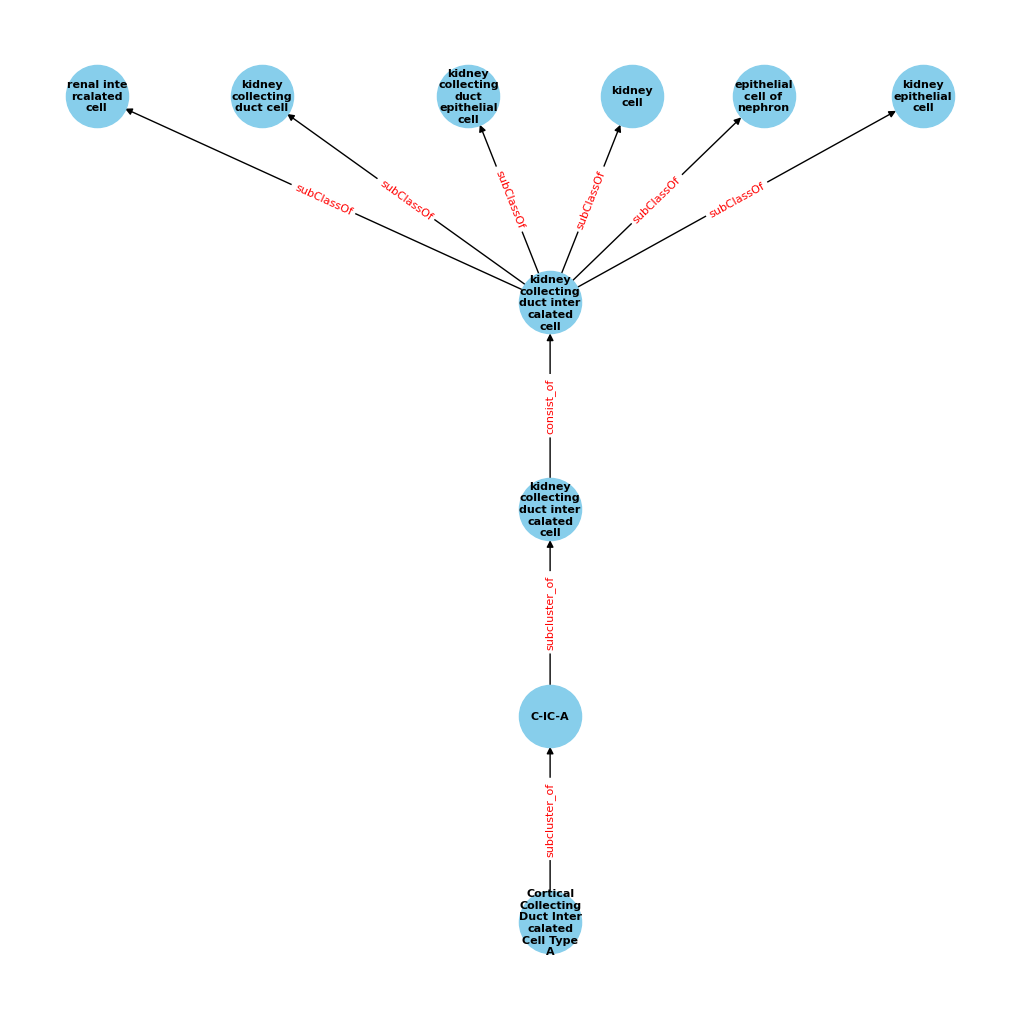

In [10]:
gg.visualize_rdf_graph(
    [
        "http://example.org/69fa1a0f-9839-4211-be06-7ff59f43bc7d",
    ],
    predicate=None,
    file_path="new_kidney.ttl",
)